Regression analysis TASK-1

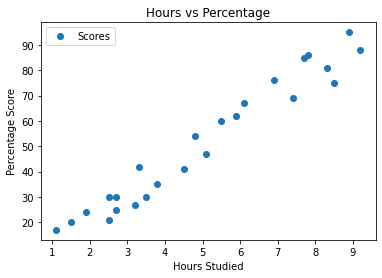

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


Determine correlation between the two variables


In [8]:
print(df.corr())
Y=df['Scores']
X = df.iloc[:, :-1].values  

 

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


Spliting of dataset in test and train

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=30)


Developing the Model

In [10]:
from sklearn.linear_model import LinearRegression 
"""
Parameters
fit_interceptbool, default=True
Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

normalizebool, default=False
This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use sklearn.preprocessing.StandardScaler before calling fit on an estimator with normalize=False.

copy_Xbool, default=True
If True, X will be copied; else, it may be overwritten.

n_jobsint, default=None
The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. 
"""
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training completed.")

Training completed.


Ploting the regression line

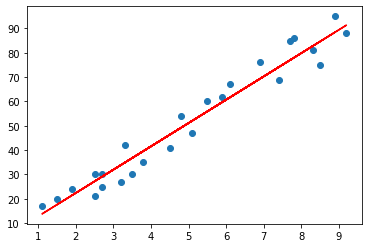

In [11]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, Y)
plt.plot(X, line,color="red");
plt.show()

Prediction of values

In [14]:
y_pred = regressor.predict(X_test)
res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(res)
print(error(y_pred))

    Actual  Predicted
10      85  76.971740
16      30  27.171723
19      69  74.098662
0       21  27.171723
23      76  69.310199
Mean Absolute Error: 5.763344662175538
None


function to determine error in desired and generated output

In [13]:
from sklearn import metrics 
def error(y_pred): 
  print('Mean Absolute Error:', 
        metrics.mean_absolute_error(y_test, y_pred))
   


Xgboost , Ridge and GridsearchCv to enhace the model


In [15]:
import xgboost as xgb
from xgboost import XGBRegressor
model=xgb.XGBRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(res)
print(error(y_pred))

[13:23:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
    Actual  Predicted
10      85  85.633820
16      30  27.237755
19      69  85.633820
0       21  27.237755
23      76  66.983292
Mean Absolute Error: 7.0568695068359375
None


In [16]:
from sklearn.linear_model import Ridge
for alpha in range(1,11,2):
  print("alpha is "+str(alpha))
  ridge=Ridge(alpha)
  ridge.fit(X_train,y_train)
  y_pred=ridge.predict(X_test)
  res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
  print(res)
  print(error(y_pred))

alpha is 1
    Actual  Predicted
10      85  76.757896
16      30  27.357156
19      69  73.907854
0       21  27.357156
23      76  69.157782
Mean Absolute Error: 5.798434963179142
None
alpha is 3
    Actual  Predicted
10      85  76.340334
16      30  27.719244
19      69  73.535271
0       21  27.719244
23      76  68.860166
Mean Absolute Error: 5.8669541647103385
None
alpha is 5
    Actual  Predicted
10      85  75.935747
16      30  28.070079
19      69  73.174266
0       21  28.070079
23      76  68.571798
Mean Absolute Error: 5.933344209189324
None
alpha is 7
    Actual  Predicted
10      85  75.543540
16      30  28.410180
19      69  72.824307
0       21  28.410180
23      76  68.292254
Mean Absolute Error: 5.997702820031284
None
alpha is 9
    Actual  Predicted
10      85  75.163153
16      30  28.740031
19      69  72.484896
0       21  28.740031
23      76  68.021134
Mean Absolute Error: 6.0601218303943085
None


In [17]:
from sklearn.model_selection import GridSearchCV
param_grid={'alpha':[0.01,.1,1,10,100,1000]}
grid=GridSearchCV(estimator=ridge,param_grid=param_grid,verbose=1)
out=grid.fit(X_train,y_train)

y_pred=out.predict(X_test)
res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(res)
out.best_params_


Fitting 5 folds for each of 6 candidates, totalling 30 fits
    Actual  Predicted
10      85  76.969584
16      30  27.173592
19      69  74.096739
0       21  27.173592
23      76  69.308662


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished


{'alpha': 0.01}